# Analysis of Difference between Measurements

### Aim: Provide an overview of difference between measurements by ICUSTAY & ITEMID 
The histograms shall be used to identify the need for chunking and determine possible chunking rules

## Load and Prepare Data

In [1]:
import pandas as pd
import pyarrow as pa
import datetime as dt
chunk_analysis_data = pd.read_parquet('./data/chunk_analysis_data.parquet', engine='pyarrow')

In [2]:
# create subsets for ITEMIDs
chunk_analysis_data_HR = chunk_analysis_data[chunk_analysis_data['ITEMID'] == 220045]
chunk_analysis_data_O2 = chunk_analysis_data[chunk_analysis_data['ITEMID'] == 220277]
chunk_analysis_data_NBP = chunk_analysis_data[chunk_analysis_data['ITEMID'] == 220179]

## Analysis of Difference between Measurements - General
Descriptve Statistics and Histogram+Boxplot on ALL data without stratifying by ITEMID

In [4]:
pd.set_option('display.float_format', '{:.2f}'.format)
chunk_analysis_data["DIF_CHARTTIME_NEXT_MIN"].describe()

count   6650040.00
mean         51.22
std         174.44
min           0.00
25%          20.00
50%          60.00
75%          60.00
max       40185.00
Name: DIF_CHARTTIME_NEXT_MIN, dtype: float64

### Change this cell to type Code only when needed - as histogram for 6 mio rows takes a lot of time
import seaborn as sns
import matplotlib.pyplot as plt

### Set variables
title = "Analysis of Difference between Measurements"
xlabel = "Difference between Measurements (min)"
plotdata = chunk_analysis_data
xvalue = "DIF_CHARTTIME_NEXT_MIN"

sns.set_style("whitegrid")
fig, (fig_box, fig_hist) = plt.subplots(
    2, 
    sharex=True, 
    gridspec_kw={"height_ratios": (.15, .85)}, 
    figsize=(10, 5)
    )
fig.suptitle(title, fontweight='bold', color= 'black', fontsize=14, y=1)
sns.boxplot(ax=fig_box, data=plotdata, x=xvalue, palette=sns.color_palette("colorblind"))
fig_box.set(xlabel="")
sns.histplot(ax=fig_hist, data=plotdata, x=xvalue, kde=True, palette=sns.color_palette("colorblind"))
fig_hist.set_xlabel(xlabel, fontsize=12, labelpad=15)
fig_hist.set_ylabel("Count", fontsize=12, labelpad=15)

### Save plot as PNG file
path = './plots/'
timestamp = dt.datetime.today().strftime('%Y-%m-%dT%H-%M-%S')
plt.savefig(str(path + 'analysis_of_difference_between_measurementsplot_300-DPI_' + timestamp + '.png'), dpi=300, bbox_inches='tight')

plt.show()

### Analysis of Difference between Measurements - General by ITEMID
Descriptve Statistics and Histogram+Boxplot on ALL data stratified by ITEMID


In [5]:
chunk_analysis_data_HR["DIF_CHARTTIME_NEXT_MIN"].describe()

count   2737997.00
mean         43.03
std          32.22
min           1.00
25%          10.00
50%          60.00
75%          60.00
max        9060.00
Name: DIF_CHARTTIME_NEXT_MIN, dtype: float64

In [6]:
chunk_analysis_data_O2["DIF_CHARTTIME_NEXT_MIN"].describe()

count   2646202.00
mean         44.31
std          42.94
min           1.00
25%          14.00
50%          60.00
75%          60.00
max       37023.00
Name: DIF_CHARTTIME_NEXT_MIN, dtype: float64

In [7]:
chunk_analysis_data_NBP["DIF_CHARTTIME_NEXT_MIN"].describe()

count   1265841.00
mean         83.39
std         390.49
min           0.00
25%          60.00
50%          60.00
75%          60.00
max       40185.00
Name: DIF_CHARTTIME_NEXT_MIN, dtype: float64

## Analysis of Differences between Measurements within 75% 
The above analysis shows us that regardless of the ITEMID, 75% of differences to the next timestamp are less than or equal to 60 minutes -> Observe the distribution of the differences to the next timestamp that fall within the 75%

Chunking Option 1: Chunk after **60min** difference to next measurement

In [8]:
# Filter data on 75% 
chunk_analysis_data_Q3 = chunk_analysis_data[chunk_analysis_data["DIF_CHARTTIME_NEXT_MIN"] <= 60]

### Histogram and Boxplott Cross ITEMID

In [9]:
# Histogram and Boxplott - Cross ITEMID
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

# Set variables
title = "Analysis of Difference between Measurements - Values within 75%"
xlabel = "Difference between Measurements (min)"
plotdata = chunk_analysis_data_Q3
xvalue = "DIF_CHARTTIME_NEXT_MIN"

sns.set_style("whitegrid")
fig, (fig_box, fig_hist) = plt.subplots(
    2, 
    sharex=True, 
    gridspec_kw={"height_ratios": (.15, .85)}, 
    figsize=(10, 5)
    )
fig.suptitle(title, fontweight='bold', color= 'black', fontsize=14, y=1)
sns.boxplot(ax=fig_box, data=plotdata, x=xvalue, palette=sns.color_palette("colorblind"))
fig_box.set(xlabel="")
sns.histplot(ax=fig_hist, data=plotdata, x=xvalue, kde=True, palette=sns.color_palette("colorblind"))
fig_hist.set_xlabel(xlabel, fontsize=12, labelpad=15)
fig_hist.set_ylabel("Count", fontsize=12, labelpad=15)

# Save plot as PNG file
path = './plots/'
timestamp = dt.datetime.today().strftime('%Y-%m-%dT%H-%M-%S')
plt.savefig(str(path + 'analysis_of_difference_between_measurementsplot_Q3_300-DPI_' + timestamp + '.png'), dpi=300, bbox_inches='tight')

plt.show()

C:\Users\D067665\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\D067665\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\D067665\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


<Figure size 1000x500 with 2 Axes>

### Histogram and Boxplot and KDE Curve Stratified by ITEMID

C:\Users\D067665\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\D067665\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\D067665\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


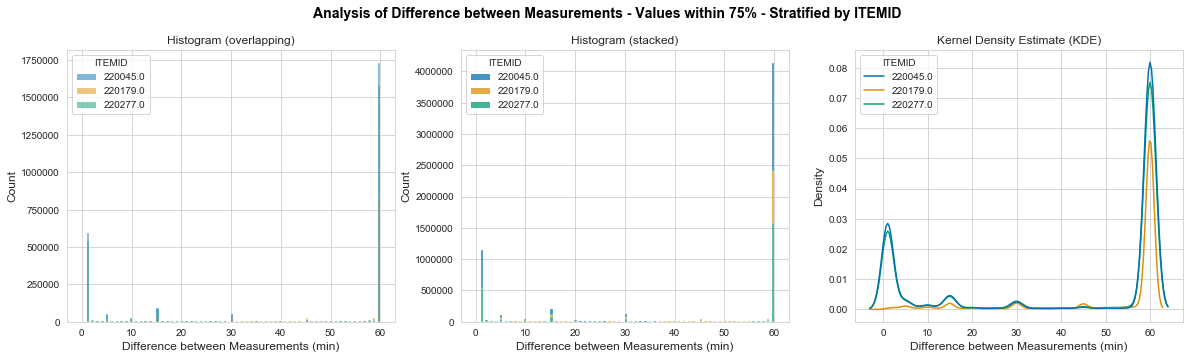

In [10]:
# Histogram and Boxplot and KDE Curve Stratified by ITEMID
import matplotlib.pyplot as plt
import seaborn as sns

# Set variables
title = "Analysis of Difference between Measurements - Values within 75% - Stratified by ITEMID"
xlabel = "Difference between Measurements (min)"
plotdata = chunk_analysis_data_Q3
xvalue = "DIF_CHARTTIME_NEXT_MIN"
stratify_by = "ITEMID"

sns.set_style("whitegrid")
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle(title, fontweight='bold', color= 'black', fontsize=14, y=1)

sns.histplot(ax=axs[0], data=plotdata, x=xvalue, hue=stratify_by, palette=[sns.color_palette("colorblind")[0],sns.color_palette("colorblind")[1],sns.color_palette("colorblind")[2]])
axs[0].set_title("Histogram (overlapping)", fontsize=12)
axs[0].set_xlabel(xlabel, fontsize=12)
axs[0].set_ylabel("Count", fontsize=12)

sns.histplot(ax=axs[1], data=plotdata, x=xvalue, hue=stratify_by, multiple="stack", palette=[sns.color_palette("colorblind")[0],sns.color_palette("colorblind")[1],sns.color_palette("colorblind")[2]])
axs[1].set_title("Histogram (stacked)", fontsize=12)
axs[1].set_xlabel(xlabel, fontsize=12)
axs[1].set_ylabel("Count", fontsize=12)

sns.kdeplot(ax=axs[2], data=plotdata, x=xvalue, hue=stratify_by, palette=[sns.color_palette("colorblind")[0],sns.color_palette("colorblind")[1],sns.color_palette("colorblind")[2]])
axs[2].set_title("Kernel Density Estimate (KDE)", fontsize=12)
axs[2].set_xlabel(xlabel, fontsize=12)
axs[2].set_ylabel("Density", fontsize=12)

# Save plot as PNG file
path = './plots/'
timestamp = dt.datetime.today().strftime('%Y-%m-%dT%H-%M-%S')
plt.savefig(str(path + 'analysis_of_difference_between_measurementsplot_Q3_by_ITEMID_300-DPI_' + timestamp + '.png'), dpi=300, bbox_inches='tight')

plt.show(fig)

In [ ]:
# Analyze observable second peak <10min
chunk_analysis_data_10 = chunk_analysis_data[chunk_analysis_data["DIF_CHARTTIME_NEXT_MIN"] <=10]
chunk_analysis_data_10["DIF_CHARTTIME_NEXT_MIN"].value_counts()
# Second peak (next to peak at 60 min) occurs at 1 min

## Analysis of Differences between Measurements above 75%

The following analysis shows that of the differences that are above 60 minutes, 75% of values are less or equal than 120 minutes (difference to next measurement)

Chunking Option 2: Chunk after **120 min** difference to the next measurement

In [ ]:
# Filter data on differences that are above the 75% 
chunk_analysis_data_above_Q3 = chunk_analysis_data[chunk_analysis_data["DIF_CHARTTIME_NEXT_MIN"] > 60]

In [ ]:
chunk_analysis_data_above_Q3["DIF_CHARTTIME_NEXT_MIN"].describe()
# We could derive another rule - e.g at 120min

### Histogram and Boxplot and KDE Curve Stratified by ITEMID

In [ ]:
# Histogram and Boxplot and KDE Curve Stratified by ITEMID
import matplotlib.pyplot as plt
import seaborn as sns

# Set variables
title = "Analysis of Difference between Measurements - Values above 75% - Stratified by ITEMID"
xlabel = "Difference between Measurements (min)"
plotdata = chunk_analysis_data_above_Q3
xvalue = "DIF_CHARTTIME_NEXT_MIN"
stratify_by = "ITEMID"

sns.set_style("whitegrid")
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle(title, fontweight='bold', color= 'black', fontsize=14, y=1)

sns.histplot(ax=axs[0], data=plotdata, x=xvalue, hue=stratify_by, palette=[sns.color_palette("colorblind")[0],sns.color_palette("colorblind")[1],sns.color_palette("colorblind")[2]])
axs[0].set_title("Histogram (overlapping)", fontsize=12)
axs[0].set_xlabel(xlabel, fontsize=12)
axs[0].set_ylabel("Count", fontsize=12)

sns.histplot(ax=axs[1], data=plotdata, x=xvalue, hue=stratify_by, multiple="stack", palette=[sns.color_palette("colorblind")[0],sns.color_palette("colorblind")[1],sns.color_palette("colorblind")[2]])
axs[1].set_title("Histogram (stacked)", fontsize=12)
axs[1].set_xlabel(xlabel, fontsize=12)
axs[1].set_ylabel("Count", fontsize=12)

sns.kdeplot(ax=axs[2], data=plotdata, x=xvalue, hue=stratify_by, palette=[sns.color_palette("colorblind")[0],sns.color_palette("colorblind")[1],sns.color_palette("colorblind")[2]])
axs[2].set_title("Kernel Density Estimate (KDE)", fontsize=12)
axs[2].set_xlabel(xlabel, fontsize=12)
axs[2].set_ylabel("Density", fontsize=12)

# Save plot as PNG file
path = './plots/'
timestamp = dt.datetime.today().strftime('%Y-%m-%dT%H-%M-%S')
plt.savefig(str(path + 'analysis_of_difference_between_measurementsplot_above_Q3_by_ITEMID_300-DPI_' + timestamp + '.png'), dpi=300, bbox_inches='tight')

plt.show(fig)

## Analyze Amount of ICUSTAY_IDs that Would be Affected by the Chunking Rule Options 

First: Chunk after 60 min

In [ ]:
len(chunk_analysis_data_above_Q3["ICUSTAY_ID"].value_counts())
#

Second: Chunk after 120 min

In [ ]:
chunk_analysis_data_above_120 = chunk_analysis_data[chunk_analysis_data["DIF_CHARTTIME_NEXT_MIN"] > 120]
len(chunk_analysis_data_above_120["ICUSTAY_ID"].value_counts())